In [1]:
import pandas as pd
import re
import numpy as np 
from time import time
import nltk
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
training_data=pd.read_csv(r"C:\Users\Shubh_Ram\Dropbox\My PC (LAPTOP-F3BSREE1)\Desktop\Online_ML_DataSets\topic_classification_data.csv")

In [3]:
training_data.head()

,Unnamed: 0,Category,Desc
0,0,News and Media,Trend Watch: Media: Trump 'Caved' on Shutdown ...
1,1,Internet,ZYCOO is the leading developer and manufacture...
2,2,Law and Government,"Zwaik,Gilbert &amp; Associates P.C Long Island..."
3,3,Beauty and Fitness,Zumba's cha-chas and pelvic thrusts can change...
4,4,Games,Zravian is the world's largest Zravian-like on...


In [4]:
print("Total sample is {}".format(training_data.shape))

Total sample is (16618, 3)


In [5]:
cat_information=training_data["Category"].value_counts()

In [6]:
len(cat_information)

26

In [7]:
#cat_information

C:\Users\Shubh_Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


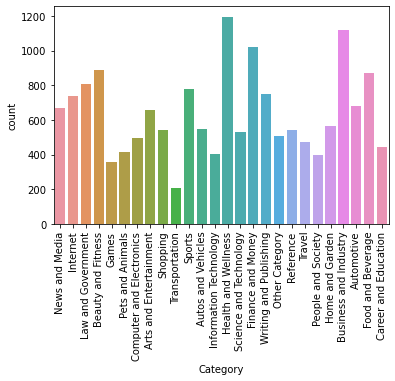

In [8]:
sb.countplot("Category",data=training_data)
plt.xticks(rotation=90)
plt.show()

In [9]:
#training_data["Desc"]

In [10]:
def text_cleaning(data):
    corpus=[]
    for i in range(0,len(data)):
        process_data=re.sub(r'\W',' ',str(data[i]))
        process_data=process_data.lower()
        process_data=re.sub(r'\d+'," ",process_data)
        process_data=re.sub(r"[^a-zA-Z]",' ',process_data)
        process_data=re.sub(r'\s+',' ',process_data)
        corpus.append(process_data)
    return corpus

In [11]:
corpus=text_cleaning(training_data["Desc"])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords

In [13]:
tf_vector=TfidfVectorizer(max_features=len(corpus),ngram_range=(1,2),min_df=1,max_df=.8,stop_words=stopwords.words('english'))

In [14]:
type(tf_vector)

sklearn.feature_extraction.text.TfidfVectorizer

In [15]:
tf_vector_matrix=tf_vector.fit_transform(corpus).todense()

In [16]:
#tf_vector_matrix

In [17]:
tf_name=tf_vector.get_feature_names()

In [18]:
x_feature=tf_vector_matrix
y_cat=training_data.Category

In [19]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x_feature,y_cat,test_size=.30,random_state=101)

In [20]:
time_s=time()
knn_model=KNeighborsClassifier()
knn_learner=knn_model.fit(Xtrain,Ytrain)
time_end=time()
time_knn=time_end-time_s
print("Time taken by knn moldel is {}".format(time_knn))

Time taken by knn moldel is 2.0647215843200684


In [21]:
#Prediction

In [22]:
time_s=time()
Ypknn=knn_learner.predict(Xtest)
acc_knnz=accuracy_score(Ypknn,Ytest)
time_end=time()
print("ACc {} and time taken {}".format(acc_knnz,(time_end-time_s)))

ACc 0.15643802647412755 and time taken 147.80216550827026


In [23]:
knn_details=[.15, .95 ,141]

In [24]:
#Model NB

In [25]:
time_s=time()
nb_model=MultinomialNB()
nb_learner=nb_model.fit(Xtrain,Ytrain)
time_end=time()
nb_train_time=time_end-time_s
print("Time taken by nb model {}".format(nb_train_time))

Time taken by nb model 2.461207151412964


In [33]:
testInput=tf_vector.transform(["virus"])

In [34]:
nb_learner.predict(testInput)

array(['Computer and Electronics'], dtype='<U24')

In [28]:
time_s=time()
Ypnb=nb_learner.predict(Xtest)
acc_nb=accuracy_score(Ypnb,Ytest)
time_end=time()
time_take=time_end-time_s
print("Acc of nb is {} and time taken {}".format(acc_nb,time_take))

Acc of nb is 0.5655836341756919 and time taken 0.8647758960723877
